<a href="https://colab.research.google.com/github/adrianadamata/Data_Science_Time_Series/blob/master/Aula_01_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Time Series


Notebook de apoio para a **Aula 001: Time Series (Séries Temporais) - Parte 1**

### 1. Como importar Time Series em Python

In [0]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [0]:
# url do dataset (endereço de consumo de eletricidade)
dataset_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe
df = pd.read_csv(dataset_path)

# visualizar as 3 primeiras entradas
df.head(3)

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502


In [0]:
# visualizar que a coluna DATE apresenta tipo de dado objeto
print("[ANTES]")
# visualizar as 3 primeiras entradas
display(df.DATE.head(3))

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
Name: DATE, dtype: object

In [0]:
# Converter objeto em datetime - coluna DATE
print("[DEPOIS]")
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head(3))

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
Name: DATE, dtype: datetime64[ns]

In [0]:
# converter DATE para datetime e associar ao index do dataframe
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# eliminar a coluna DATE
df.drop('DATE', inplace=True, axis=1)

# ver as 3 primeiras entradas
df.head(3)

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502


### 2. Visualizar Séries Temporais

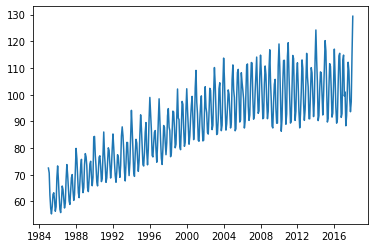

In [0]:
# plotar gráfico de consumo de eletricidade de acordo com a data
plt.plot(df.index, df.Value);

### 3. Decomposição de uma Time Series em três componentes

Uma série temporal pode ser decomposta em tendência, sazonalidade e ruído aleatório (resíduo). A função `seasonal_decompose()` faz a análise estatística do dataframe e o decompõe.

A biblioteca `stats`
from statsmodels.tsa.seasonal import seasonal_decompose


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

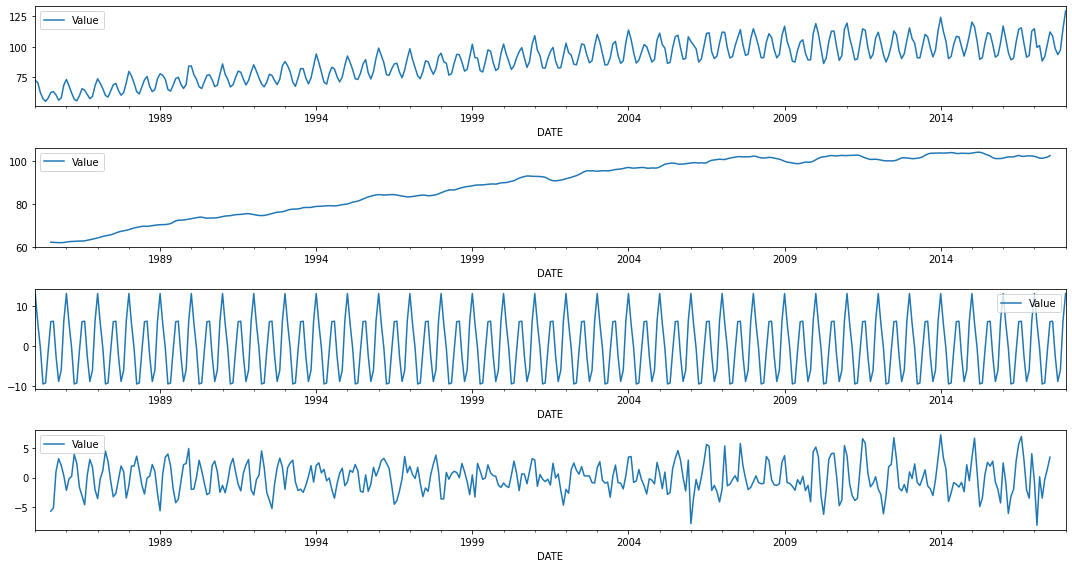

In [0]:
# salvar a decomposicao em result
result = seasonal_decompose(df)

# plotar a decomposicao
#result.plot();

# plotar maior
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
# dataframe como observado
result.observed.plot(ax=ax1)
# componente de tendencia do dataframe
result.trend.plot(ax=ax2)
# componente de sazonalidade do dataframe
result.seasonal.plot(ax=ax3)
# componente de residuo do dataframe
result.resid.plot(ax=ax4)
# ajusta automaticamente para que se ajustem à área da figura
plt.tight_layout();

### 4. Dataset de Ferrovia - Análise Exploratória e Extração de Features

Dataset de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão.


In [0]:
# importar dataset do endereço url
ferroviaria_dataset = "https://raw.githubusercontent.com/carlosfab/datasets/master/jetrail/jetrail.csv"

# converter dataset em dataframe
df_trem = pd.read_csv(ferroviaria_dataset)

# ver as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


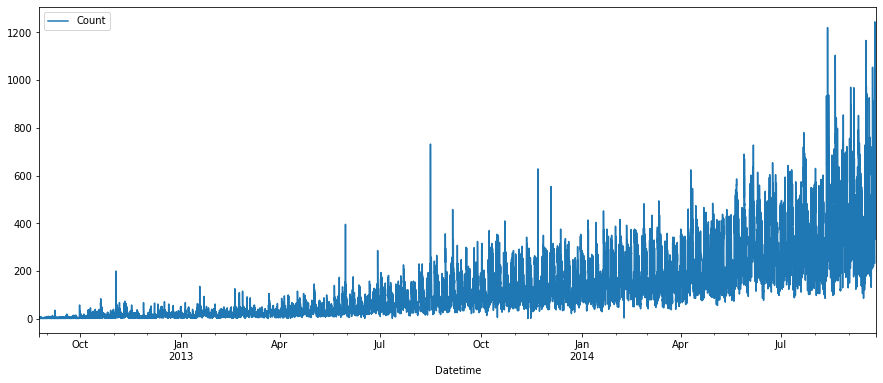

In [0]:
# converter a coluna Datetime do tipo objeto para tipo datetime; 
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# plotar gráfico
fig, ax = plt.subplots(figsize=(15,6))
df_trem.plot(x='Datetime', y='Count', ax=ax);

**Hipóteses:**
* Pessoas viajam mais durante a semana.
* Há horários de pico por causa das indas e vindas do trabalho.
* Há períodos do ano onde a demanda por transporte é maior.

In [0]:
# criar features para cada período
# criar coluna do ano de cada entrada
df_trem['year'] = df_trem.Datetime.dt.year
# criar coluna do mês de cada entrada
df_trem['month'] = df_trem.Datetime.dt.month
# criar coluna do dia do mês de cada entrada
df_trem['day'] = df_trem.Datetime.dt.day
# criar coluna da hora de cada entrada
df_trem['hour'] = df_trem.Datetime.dt.hour
# criar coluna do dia da semana de cada entrada (varia de 0 a 6) seg ter quar qui sex sab dom
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

In [0]:
# verificar as 5 primeiras entradas
df_trem.tail()

,ID,Datetime,Count,year,month,day,hour,day_of_week
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3


* Pessoas viajam mais durante a semana

In [0]:
# criar nova coluna de 'weekend' atribuir valor 0
df_trem['weekend'] = 0
# se o dia da semana for 5 ou 6 atribui valor 1
df_trem.loc[(df_trem.day_of_week == 5) | (df_trem.day_of_week == 6), 'weekend'] = 1

In [0]:
# verificar a qtde de dias de semana (0) versus finais de semana (1)
df_trem.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

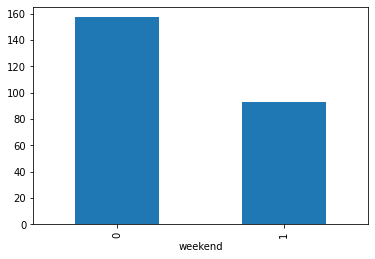

In [0]:
# plotar a análise de qtde de entradas 0 e 1
df_trem.groupby('weekend').Count.mean().plot.bar()

O movimento é maior durante a semana nessa companhia ferroviária. No entanto, no fim de semana acaba se concentrando um volume maior de viagens, pois são apenas 2 dias, comparados aos 5 dias da semana.

* Há horários de pico por causa das indas e vindas do trabalho.

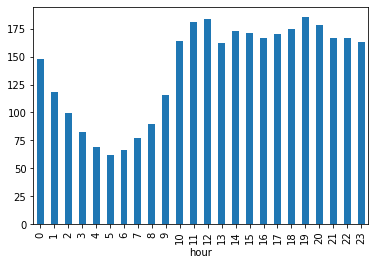

In [0]:
# ver count por horários
df_trem.groupby('hour').Count.mean().plot.bar();

* Há períodos do ano onde a demanda por transporte é maior.

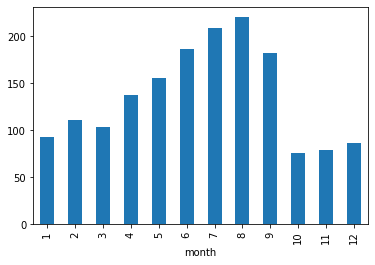

In [0]:
df_trem.groupby('month').Count.mean().plot.bar();